In [ ]:
import pandas as pd
import json
# Specify the path to your JSON file
json_file_path = "/Users/alizia/AliDivi/backgroundchecker2.json"
# Read the JSON file and load it into a DataFrame
df = pd.read_json(json_file_path)
# Load the JSON data
with open(json_file_path, 'r') as f:
    data = json.load(f)
# Normalize the nested JSON column
df = pd.json_normalize(data, 'data', record_prefix='nested_')
# Print the DataFrame
#print(df.describe());
styled_df = df.style \
    .set_properties(**{'text-align': 'center'}) \
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#000000'), ('font-weight', 'bold')]
    }])

df['nested_approved'] = (df['nested_approved'] == True).astype(int)
styled_df

,nested_id,nested_date,nested_companyName,nested_amount,nested_document,nested_approved,nested_inProcessing,nested_ignoreCache,nested_reprocessing,nested_ignorePartnersLimit,nested_totalPartners,nested_clientId,nested_createdAt,nested_updatedAt
0,81,2023-03-02T21:45:51.569Z,VP PRODUTOS DIGITAIS LTDA.,30000,38015705000155,1,False,False,True,False,1,79,2023-03-02T21:46:55.392Z,2023-03-02T21:48:05.396Z
1,80,2023-01-24T18:31:25.899Z,VP PRODUTOS DIGITAIS LTDA.,50000,38015705000155,1,False,False,False,False,1,79,2023-01-24T18:31:56.831Z,2023-01-24T18:33:08.560Z
2,79,2023-01-20T13:06:09.163Z,RENAN CAMARGO ALBERS SERVICOS ADMINISTRATIVOS LTDA,10000,37499594000137,1,False,False,False,False,1,77,2023-01-20T13:06:20.737Z,2023-01-20T13:07:28.929Z
3,78,2023-01-02T19:25:27.102Z,TIA IZA ALIMENTOS LTDA,40000,42873034000130,1,False,False,True,False,4,72,2023-01-02T19:35:03.246Z,2023-01-02T19:36:36.625Z
4,77,2022-12-21T17:41:58.894Z,TIA IZA ALIMENTOS LTDA,40000,42873034000130,1,False,True,False,False,4,72,2022-12-21T17:44:09.250Z,2022-12-21T17:45:30.374Z
5,76,2022-12-19T17:55:27.477Z,EBBC COMERCIO DE COSMETICOS E PRODUTOS DE HIGIENE LTDA,8000,12941061000132,1,False,False,True,False,3,10,2022-12-19T17:58:47.551Z,2022-12-19T17:59:48.182Z
6,75,2022-12-19T17:28:02.112Z,TIA IZA ALIMENTOS LTDA,40000,42873034000130,1,False,False,False,False,4,72,2022-12-19T17:32:06.130Z,2022-12-19T17:33:36.171Z
7,74,2022-12-19T17:24:39.742Z,EBBC COMERCIO DE COSMETICOS E PRODUTOS DE HIGIENE LTDA,5000,12941061000132,1,False,False,True,False,3,10,2022-12-19T17:25:09.912Z,2022-12-19T17:26:20.686Z
8,73,2022-12-19T15:55:44.958Z,EBBC COMERCIO DE COSMETICOS E PRODUTOS DE HIGIENE LTDA,2210,12941061000132,1,False,False,True,False,3,10,2022-12-19T16:01:08.750Z,2022-12-19T16:02:14.025Z
9,72,2022-12-19T15:05:15.507Z,EBBC COMERCIO DE COSMETICOS E PRODUTOS DE HIGIENE LTDA,550,12941061000132,1,False,False,True,False,3,10,2022-12-19T15:05:32.302Z,2022-12-19T15:06:38.725Z


In [ ]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from scipy import stats
import pandas as pd
df['nested_date'] = df['nested_date'].str.slice(0,10)
df

,nested_id,nested_date,nested_companyName,nested_amount,nested_document,nested_approved,nested_inProcessing,nested_ignoreCache,nested_reprocessing,nested_ignorePartnersLimit,nested_totalPartners,nested_clientId,nested_createdAt,nested_updatedAt
0,81,2023-03-02,VP PRODUTOS DIGITAIS LTDA.,30000,38015705000155,1,False,False,True,False,1,79,2023-03-02T21:46:55.392Z,2023-03-02T21:48:05.396Z
1,80,2023-01-24,VP PRODUTOS DIGITAIS LTDA.,50000,38015705000155,1,False,False,False,False,1,79,2023-01-24T18:31:56.831Z,2023-01-24T18:33:08.560Z
2,79,2023-01-20,RENAN CAMARGO ALBERS SERVICOS ADMINISTRATIVOS ...,10000,37499594000137,1,False,False,False,False,1,77,2023-01-20T13:06:20.737Z,2023-01-20T13:07:28.929Z
3,78,2023-01-02,TIA IZA ALIMENTOS LTDA,40000,42873034000130,1,False,False,True,False,4,72,2023-01-02T19:35:03.246Z,2023-01-02T19:36:36.625Z
4,77,2022-12-21,TIA IZA ALIMENTOS LTDA,40000,42873034000130,1,False,True,False,False,4,72,2022-12-21T17:44:09.250Z,2022-12-21T17:45:30.374Z
5,76,2022-12-19,EBBC COMERCIO DE COSMETICOS E PRODUTOS DE HIGI...,8000,12941061000132,1,False,False,True,False,3,10,2022-12-19T17:58:47.551Z,2022-12-19T17:59:48.182Z
6,75,2022-12-19,TIA IZA ALIMENTOS LTDA,40000,42873034000130,1,False,False,False,False,4,72,2022-12-19T17:32:06.130Z,2022-12-19T17:33:36.171Z
7,74,2022-12-19,EBBC COMERCIO DE COSMETICOS E PRODUTOS DE HIGI...,5000,12941061000132,1,False,False,True,False,3,10,2022-12-19T17:25:09.912Z,2022-12-19T17:26:20.686Z
8,73,2022-12-19,EBBC COMERCIO DE COSMETICOS E PRODUTOS DE HIGI...,2210,12941061000132,1,False,False,True,False,3,10,2022-12-19T16:01:08.750Z,2022-12-19T16:02:14.025Z
9,72,2022-12-19,EBBC COMERCIO DE COSMETICOS E PRODUTOS DE HIGI...,550,12941061000132,1,False,False,True,False,3,10,2022-12-19T15:05:32.302Z,2022-12-19T15:06:38.725Z


# Finding some correlations

First we make sure both the amount and number of partners are ints (preprocessing) (I reran this by msitake the amount was originally a string so I needed to convert)

In [ ]:
df.dtypes

nested_id                      int64
nested_date                   object
nested_companyName            object
nested_amount                 object
nested_document               object
nested_approved                int64
nested_inProcessing             bool
nested_ignoreCache              bool
nested_reprocessing             bool
nested_ignorePartnersLimit      bool
nested_totalPartners           int64
nested_clientId                int64
nested_createdAt              object
nested_updatedAt              object
dtype: object

In [ ]:
df['nested_amount'] = pd.to_numeric(df['nested_amount'])

In [ ]:
df.dtypes

nested_id                       int64
nested_date                    object
nested_companyName             object
nested_amount                 float64
nested_document                object
nested_approved                 int64
nested_inProcessing              bool
nested_ignoreCache               bool
nested_reprocessing              bool
nested_ignorePartnersLimit       bool
nested_totalPartners            int64
nested_clientId                 int64
nested_createdAt               object
nested_updatedAt               object
dtype: object

Now we can find a simple correlation to start

In [ ]:
df['nested_totalPartners'].corr(df['nested_amount'])

0.4404051158526573

Seems to be slighty unrelated (lol). We can try to visualize this as well with https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression

In [ ]:
X = df[['nested_totalPartners']]
y = df[['nested_amount']]


In [ ]:
my_linear_regressor = LinearRegression()

In [ ]:
my_linear_regressor.fit(X,y)

LinearRegression()

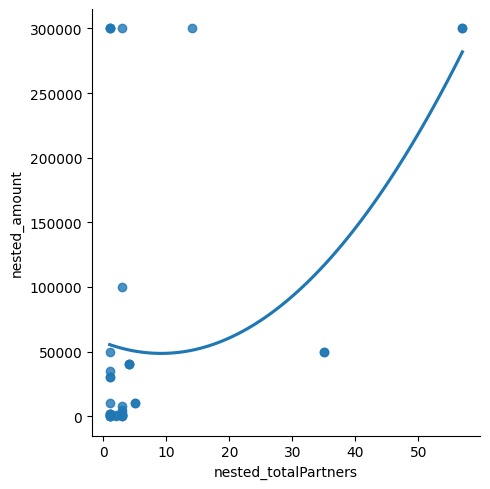

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lmplot(x ="nested_totalPartners", y ="nested_amount", data = df, order = 2, ci = None)

In [ ]:
df.drop(['nested_id', 'nested_ignorePartnersLimit', 'nested_clientId'], axis=1).corr()

<ipython-input-14-24e40d87b0b7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.drop(['nested_id', 'nested_ignorePartnersLimit', 'nested_clientId'], axis=1).corr()


,nested_amount,nested_approved,nested_inProcessing,nested_ignoreCache,nested_reprocessing,nested_totalPartners
nested_amount,1.000000,0.284394,NaN,0.413680,-0.343792,0.440405
nested_approved,0.284394,1.000000,NaN,-0.021026,-0.021026,-0.057750
nested_inProcessing,NaN,NaN,NaN,NaN,NaN,NaN
nested_ignoreCache,0.413680,-0.021026,NaN,1.000000,-0.461538,-0.025345
nested_reprocessing,-0.343792,-0.021026,NaN,-0.461538,1.000000,-0.081998
nested_totalPartners,0.440405,-0.057750,NaN,-0.025345,-0.081998,1.000000


The booleans here are causing some issues, so we can try to use Pearson correlation

In [ ]:
df["nested_inProcessing"] = df["nested_inProcessing"].astype(int)
df["nested_ignoreCache"] = df["nested_ignoreCache"].astype(int)
df["nested_reprocessing"] = df["nested_reprocessing"].astype(int)
df["nested_ignorePartnersLimit"] = df["nested_ignorePartnersLimit"].astype(int)

In [ ]:
df.set_index('nested_id')
graphableDF = df.drop(['nested_companyName', 'nested_document', 'nested_createdAt','nested_updatedAt','nested_id', 'nested_ignorePartnersLimit', 'nested_ignoreCache', 'nested_clientId'], axis=1)
graphableDF.corr(method='pearson')


<ipython-input-16-62c1aad8b583>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  graphableDF.corr(method='pearson')


,nested_amount,nested_approved,nested_inProcessing,nested_reprocessing,nested_totalPartners
nested_amount,1.000000,0.284394,NaN,-0.343792,0.440405
nested_approved,0.284394,1.000000,NaN,-0.021026,-0.057750
nested_inProcessing,NaN,NaN,NaN,NaN,NaN
nested_reprocessing,-0.343792,-0.021026,NaN,1.000000,-0.081998
nested_totalPartners,0.440405,-0.057750,NaN,-0.081998,1.000000


We can also use seaborn to visualize:

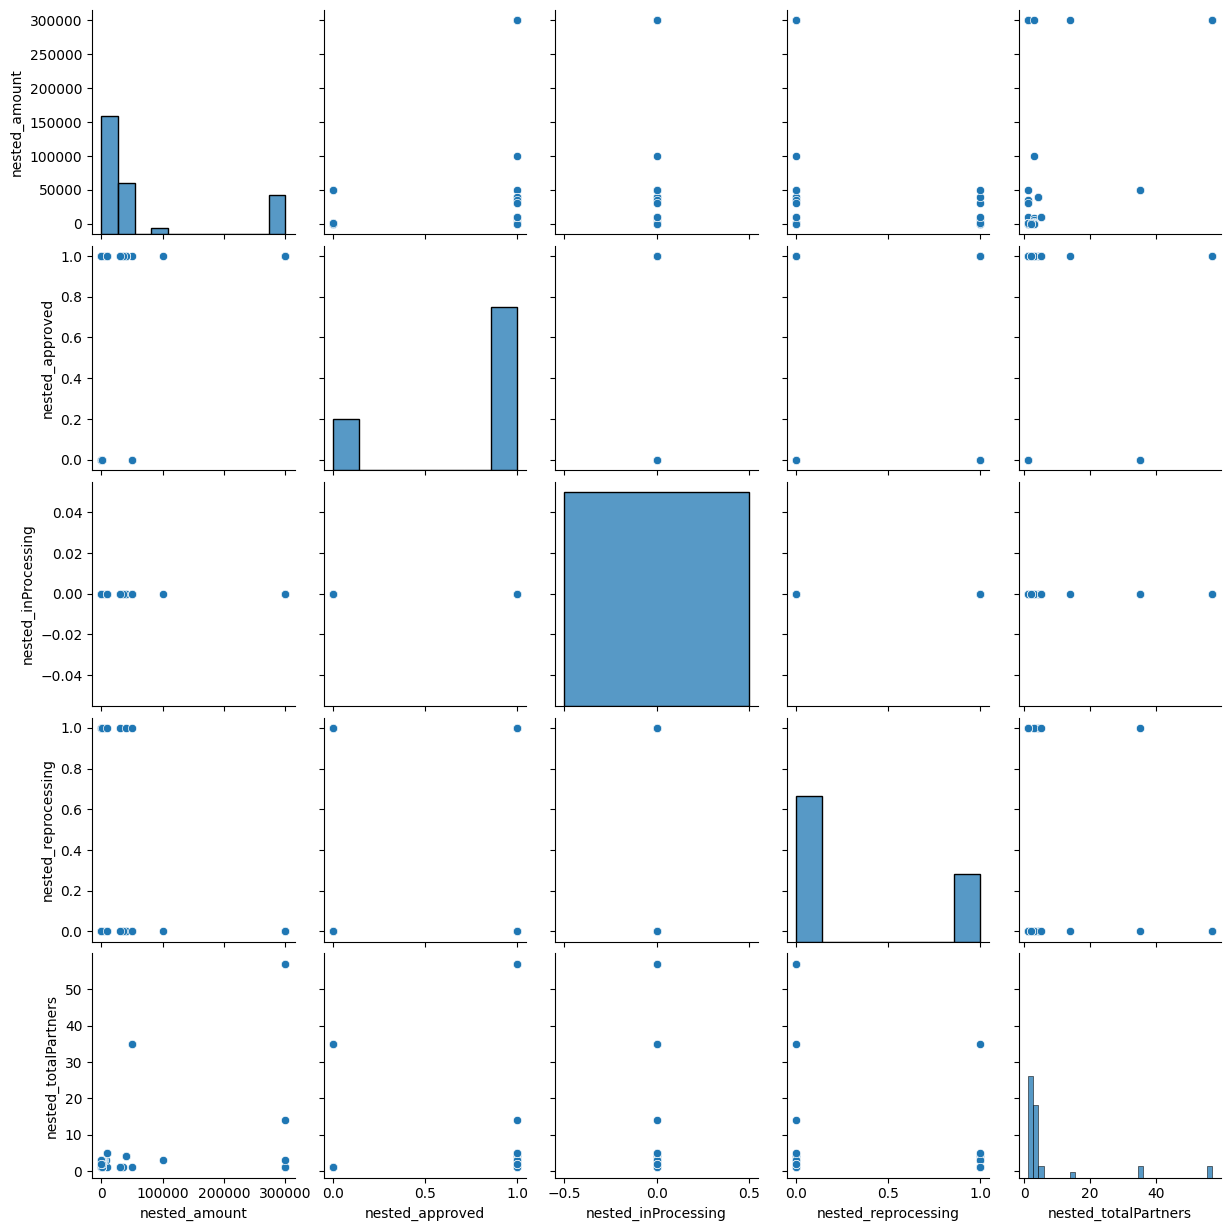

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(graphableDF)

For the sake of the heatmap and me not being sure of how to graph the dates as numbers in a way that makes sense, I removed them from graphableDF

In [ ]:
graphableDF.drop(['nested_date'], axis=1)

,nested_amount,nested_approved,nested_inProcessing,nested_reprocessing,nested_totalPartners
0,30000.00,1,0,1,1
1,50000.00,1,0,0,1
2,10000.00,1,0,0,1
3,40000.00,1,0,1,4
4,40000.00,1,0,0,4
5,8000.00,1,0,1,3
6,40000.00,1,0,0,4
7,5000.00,1,0,1,3
8,2210.00,1,0,1,3
9,550.00,1,0,1,3


In [ ]:
graphableDF.dtypes

nested_date              object
nested_amount           float64
nested_approved           int64
nested_inProcessing       int64
nested_reprocessing       int64
nested_totalPartners      int64
dtype: object

<Axes: >

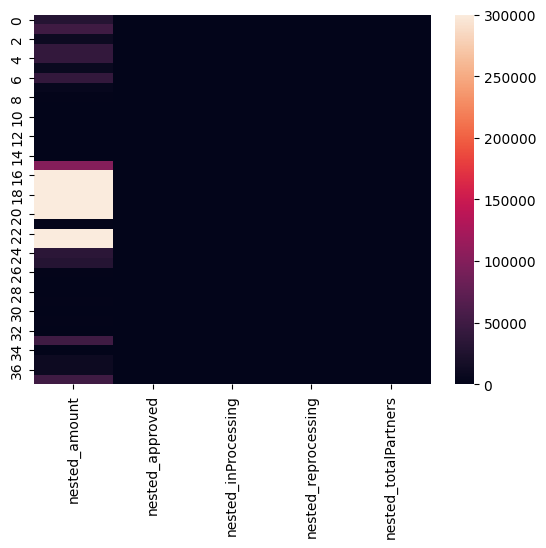

In [ ]:
sns.heatmap(graphableDF.drop(['nested_date'], axis=1))

In [ ]:
len(df. index)

38

Checklist for tomorrow:


*   Figure out a good way to represent time in terms of the dates
*   Figure out why only 38 pieces of data. Is this all we have or something wrong? Maybe ask Hugo or Will
* Try 2 other forms of regression

